# Gerar dados

Coroas

In [26]:
from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(n_samples=2500, n_features=2, n_classes=3, random_state=32)
X

array([[ 0.64690513, -0.11740358],
       [-0.5844759 , -0.45109348],
       [-0.51459268, -0.51529445],
       ...,
       [-0.34593349, -0.50873681],
       [-0.01284879,  1.2585482 ],
       [-0.27585595,  0.24428112]])

Pizzas

In [22]:
from gerar_pizzas import gerar_classes_pizza
X, y = gerar_classes_pizza(n_pontos_por_classe=200, ruido_angular = [.4, .4, .2, .2, .2], delta_angulos = [.45, -.45, +0.2, 0, -.1])
mask = (y == 0) | (y == 1)
X[mask, 0] = X[mask, 0] * 0.7 + X[mask, 0].mean() * 0.3
X[mask, 1] = X[mask, 1] * 0.7 + X[mask, 1].mean() * 0.3
X_plot = X[:, :2]
X = X_plot
X

array([[ 2.68249853,  0.81089695],
       [ 2.32087971,  0.60184178],
       [ 3.47759454,  1.72427541],
       ...,
       [ 0.96281231, -4.75879236],
       [ 0.26002747, -1.63966063],
       [ 0.29263209, -4.87907929]])

# Normalizar dados e dividir entre treino e teste

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
print(f'Tamanho do conjunto de treino: {x_train.shape}')
print(f'Tamanho do conjunto de teste: {x_test.shape}')

Tamanho do conjunto de treino: (2000, 2)
Tamanho do conjunto de teste: (500, 2)


# Descarregar OvO através do scikit-learn 

Acurácia de treino: 0.32
Acurácia de teste: 0.35


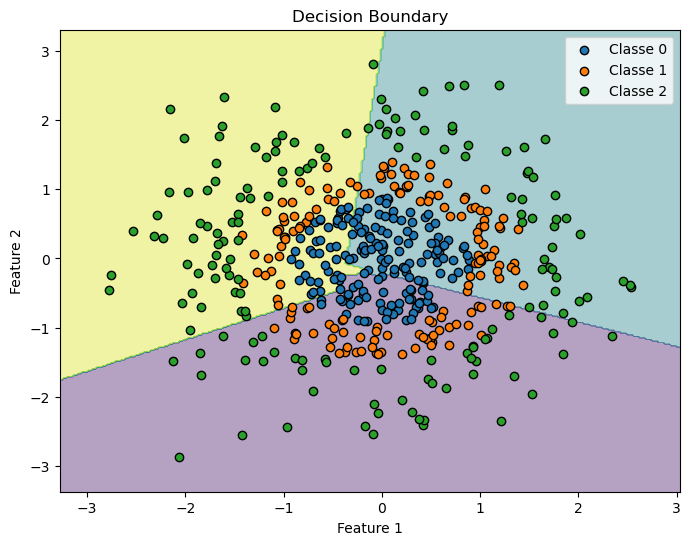

In [28]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

clf = OneVsOneClassifier(
    estimator=LogisticRegression(dual=False, random_state=10, max_iter=1000, solver='sag')).fit(x_train, y_train)

y_pred = clf.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(clf, x_test, y_test, resolution=300)

# Descarregar ECOC através do scikit-learn

Acurácia de treino: 0.33
Acurácia de teste: 0.34


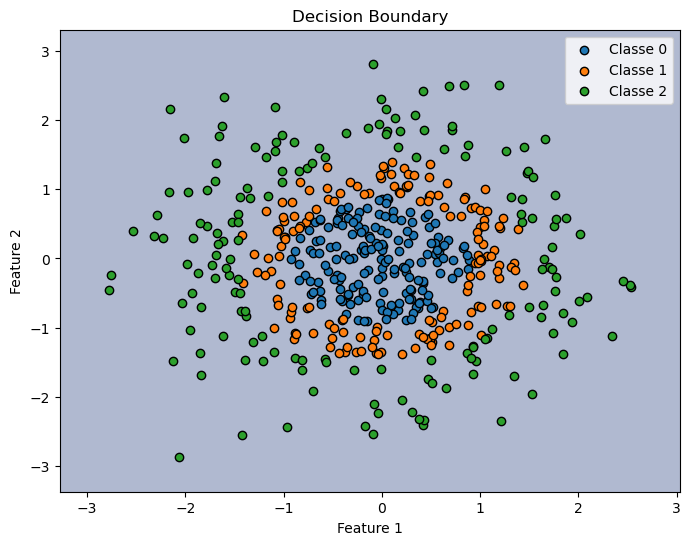

In [29]:
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import LogisticRegression
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

clf = OutputCodeClassifier(
    estimator=LogisticRegression(dual=False, random_state=10, max_iter=1000, solver='sag'),
    random_state=0).fit(x_train, y_train)

y_pred = clf.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(clf, x_test, y_test, resolution=300)